In [112]:
import cv2
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
import scipy
import yaml

In [19]:
def simulate_bin_circle():
    image = np.zeros((128, 128), dtype=np.float32)
    center_coordinates = (40, 30)
    center_coordinates2 = (40, 90)
    radius = 20

    color_border = (128, 0, 0)
    color_hole = (255, 0, 0)
    color = (191, 0, 0)
    
    thickness_border = -1
    thickness_hole = -1

    # image_border = cv2.circle(image_border, center_coordinates, radius, color, thickness_border)
    image_border = cv2.circle(image, center_coordinates, radius+2, color_border, thickness_border)
    image_hole = cv2.circle(image_border, center_coordinates, radius, color_hole, thickness_hole)
    # image_border = cv2.circle(image_hole, center_coordinates, radius+2, color_border, thickness_border)



    
    # image_border = cv2.circle(image_hole, center_coordinates2, radius+2, color_border, thickness_border)
    # image_hole = cv2.circle(image_border, center_coordinates2, radius, color_hole, thickness_hole)

    # print(np.unique(image_border))
    plt.imshow(image_hole, cmap='gray')
    plt.show()

    cv2.imwrite('./data/test_img_two.png', image_border)
    return image_border

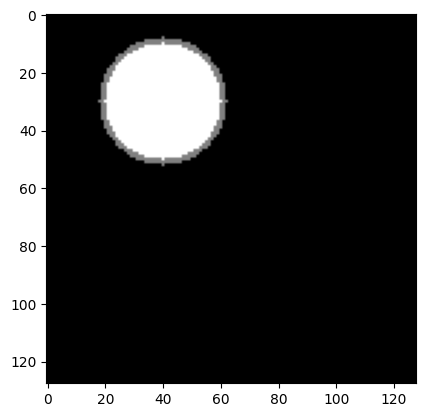

In [20]:
img = simulate_bin_circle()

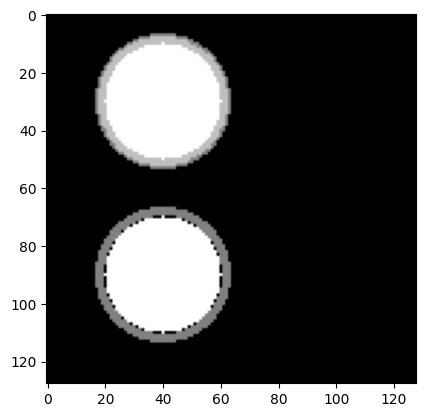

In [339]:
img_two = cv2.imread('./data/test_img_two.png', 0)
plt.imshow(img_two, cmap='gray')
plt.show()

- написать базовый алгоритм для вычисления сигнала:
    - для фона угол = 0 градусов
    - для дна угол = 0 градусов
    - для короткой границы угол = 80 градусов

- алгоритм должен определять где фон, где края, где дно
- алгоритм должен определять ширину границы
- алгоритм должен определять ширину дна
- алгоритм должен определять угол 

In [3]:
test = np.array([[0, 0, 0, 0, 0],
                [0, 1, 0, 1, 0],
                [1, 1, 2, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0]], dtype=np.uint8)
mask_test = cv2.inRange(test, 1, 1)

distances_img = np.zeros_like(img_two, dtype=np.float32)
distances = np.zeros_like(test, dtype=np.float32)


dist_transform = cv2.distanceTransform(mask_test, cv2.DIST_L2, 5)
# np.round(dist_transform, 1)
dist_transform

# for r in range(test.shape[0]):
#     for c in range(test.shape[1]):
#         if test[r, c] == 2:
#             distances[r, c] =  dist_transform[r, c]
# distances


# mask_hole = cv2.inRange(img_two, 80, 80)
# contours_hole, _ = cv2.findContours(mask_hole, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# for contour in contours_hole:
#     (x, y), radius = cv2.minEnclosingCircle(contour)
#     print(int(radius))

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

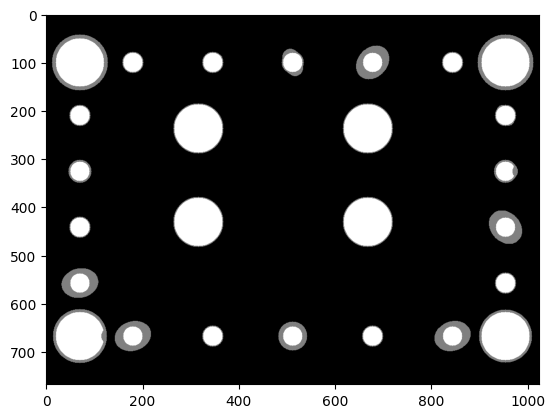

In [53]:
# img_large = cv2.imread('./data/test_img_large_border.png', 0).astype(np.float32)
img_large = cv2.imread('./input_mask.png', 0).astype(np.float32)

plt.imshow(img_large, cmap='gray')
plt.show()

- возможно применить фильтр гаусса для размытости

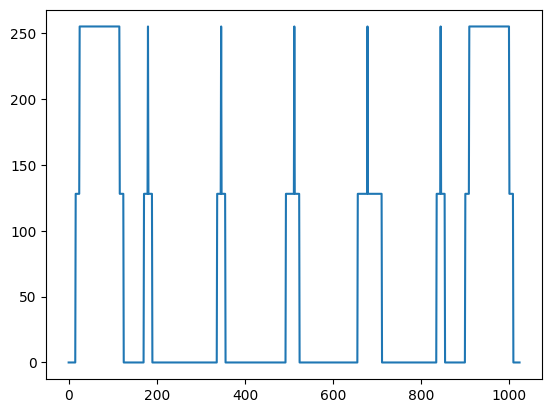

In [54]:
copy_img = img_large.copy()
# copy_img[img_large == 255] = 20
# copy_img[img_large == 0] = 80
# copy_img[img_large == 128] = 60
# copy_img = cv2.GaussianBlur(copy_img, (0, 0), sigmaX=5, sigmaY=5)

plt.plot(copy_img[80].ravel())

In [24]:
img_two_ = img_two.copy()
img_two_[img_two == 255] = 0
img_two_[img_two == 0] = 120
img_two_[img_two == 128] = 255


img_two_ = cv2.GaussianBlur(img_two_, (0, 0), sigmaX=3, sigmaY=3)


plt.plot(img_two_[:, 40])

NameError: name 'img_two' is not defined

- получились координаты всех серых пикселей
- можно проходить по ним, это уже меньше, чем все изображение
- начиная с каждого, ищем самый первый черный


так, а если это бин маска и цвет у нас - это единички
можно же просто посчитать колво единичек да разрывов

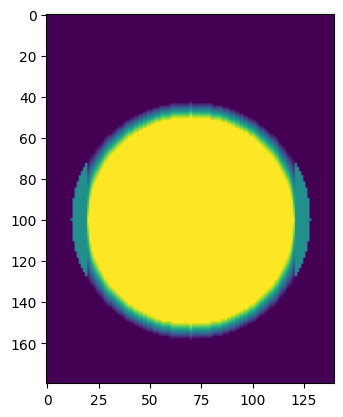

In [32]:
img_large = copy_crop.copy()
plt.imshow(img_large)

In [259]:
mask_bord_bin = crop == 128
mask_bord_bin = mask_bord_bin.astype(np.uint8)

rows, cols = img_large.shape

dist_image_cols = [[[] for  _ in range(cols)] for _ in range(rows)]

dist_y = np.zeros_like(mask_bord_bin, dtype=np.float32)

for col in range(cols):
    # print(col)
    col_mask = mask_bord_bin[:, col]
    nonzero_ind = np.nonzero(col_mask)[0]
    start_ind = np.where(np.diff(col_mask == 1))[0] + 1
    segments = np.split(col_mask, start_ind)
    tmp = 0 
    
    for segm in segments:
        dist_y[:, col][tmp:tmp + len(segm)] = (len(segm))
        tmp = tmp + len(segm)

dist_x = np.zeros_like(mask_bord_bin, dtype=np.float32)
for row in range(rows):
    # print(row)
    # if row == 768:
    #     print('ew')
    row_mask = mask_bord_bin[row,:]
    nonzero_ind = np.nonzero(row_mask)[0]
    start_ind = np.where(np.diff(row_mask == 1))[0] + 1
    segments = np.split(row_mask, start_ind)
    tmp = 0 
    
    for segm in segments:
        dist_x[row, :][tmp:tmp + len(segm)] = (len(segm))
        tmp = tmp + len(segm)

dist = np.zeros_like(dist_x,dtype=np.float32)
dist[img_large == 128] = np.minimum(dist_x[img_large == 128], dist_y[img_large == 128])
dist[img_large != 0] = np.minimum(dist_x[img_large != 0], dist_y[img_large != 0])
# dist = np.max(dist_x, dist_y)
   

 

IndexError: index 140 is out of bounds for axis 1 with size 140

In [48]:
E = 50

signal = np.zeros_like(img_large, dtype=np.float32)
# signal[img_large == 0] = 0.2 * E * np.cos(np.radians(90-1))**(0.87)
# signal[img_large == 128] = E * np.cos(np.radians((180 - 90 - 80)))**(0.87)
# signal[img_large == 255] = 0.7 * E * np.cos(np.radians(90))**(1.1)
alpha = np.arctan(700 / (dist[img_large == 128] * 12))
signal[img_large == 0] =  E / np.cos(np.radians(1))**(0.87)
signal[img_large == 128] = E / np.cos(np.radians(90-(180 - 90 - 80)))**(0.87)
signal[img_large == 255] = 0.3 * E / np.cos(np.radians(1))**(1.1)

In [35]:
# E = 250
E = 50
signal = np.zeros_like(img_large, dtype=np.float32)
# signal[img_large == 0] = 0.2 * E * np.cos(np.radians(90-1))**(0.87)
# signal[img_large == 128] = E * np.cos(np.radians((180 - 90 - 80)))**(0.87)
# signal[img_large == 255] = 0.7 * E * np.cos(np.radians(90))**(1.1)

alpha = np.arctan(700 / (dist[crop == 128] * 12))
signal[crop == 0] =  E / np.cos(np.radians(1))**(0.87)
signal[crop == 128] = E / np.cos(np.radians(90)-(np.radians(180 - 90) - alpha))**(0.87)
signal[crop == 255] = 0.3 * E / np.cos(np.radians(1))**(1.1)

cv2.imwrite('output_raw.png', np.clip(signal, 0, 255).astype(np.uint8))



/tmp/ipykernel_642/878641294.py:8: RuntimeWarning: divide by zero encountered in divide
  alpha = np.arctan(700 / (dist[crop == 128] * 12))
/tmp/ipykernel_642/878641294.py:10: RuntimeWarning: invalid value encountered in power
  signal[crop == 128] = E / np.cos(np.radians(90)-(np.radians(180 - 90) - alpha))**(0.87)


True

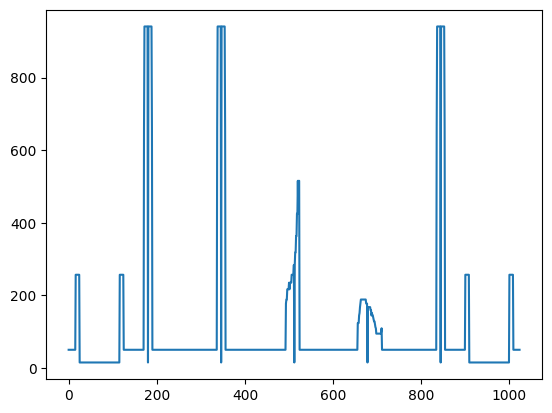

In [57]:
plt.plot(signal[80].ravel())

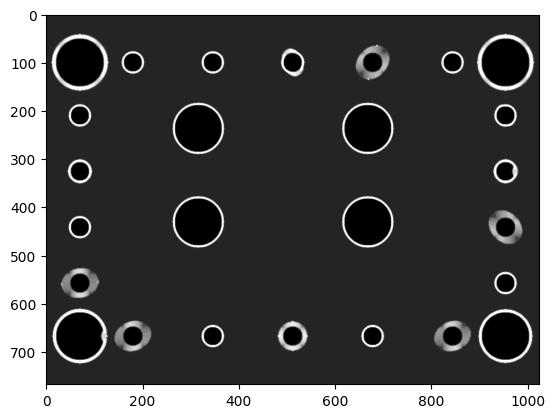

In [59]:
blured = cv2.GaussianBlur(signal, (9, 9), sigmaX=1, sigmaY=1)
plt.imshow(np.clip(blured, 0, 255), cmap='gray')

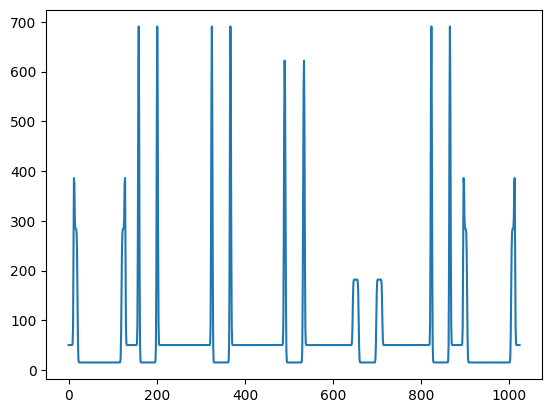

In [80]:
plt.plot(blured[100].ravel())

In [72]:
pixel_values = blured.flatten()
pixel_values.shape

(786432,)

In [74]:
np.arange(len(pixel_values)).shape

(786432,)

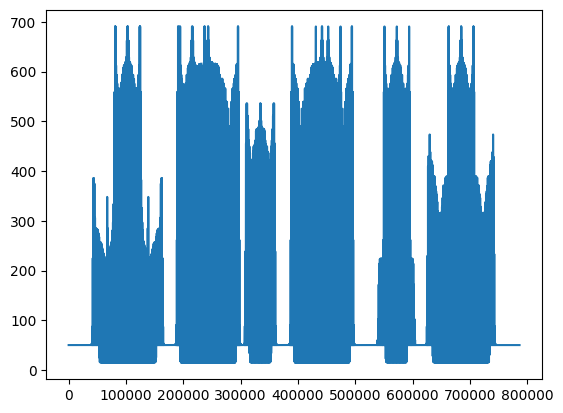

In [79]:
def poly(x, a, b, c):
    return a*x**2+b*x+c

par, cov = curve_fit(poly, np.arange(len(pixel_values)), pixel_values)
a, b, c = par
# a, b, c
cs = CubicSpline(np.arange(len(pixel_values)), pixel_values)
new_y = cs(np.arange(len(pixel_values)))

x_new = np.arange(len(pixel_values))
# y_new = poly(x_new, a, b, c)
# plt.plot(x_new, y_new)
plt.plot(np.arange(len(pixel_values)), new_y)

# plt.plot(np.arange(len(pixel_values)), pixel_values)


### test for crop

- интерполяция сплайнами 
- трехмерная интерполяция
- делать интерполяцию по участкам
- 

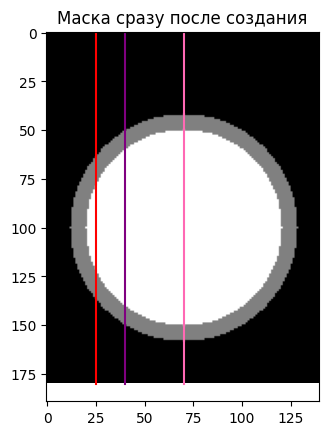

In [113]:
img_large = cv2.imread('./input_mask.png', 0).astype(np.float32)

plt.imshow(img_large[:180, :140], cmap='gray')
# plt.plot([0, 140], [100, 100])
plt.plot([70, 70], [0, 180], color='hotpink')
plt.plot([40, 40], [0, 180], color='purple')
plt.plot([25, 25], [0, 180], color='red')
plt.title('Маска сразу после создания')
plt.show()

crop = img_large[:180, :140]

mask_hole = cv2.inRange(crop, 255, 255)
mask_back = cv2.inRange(crop, 0, 0)

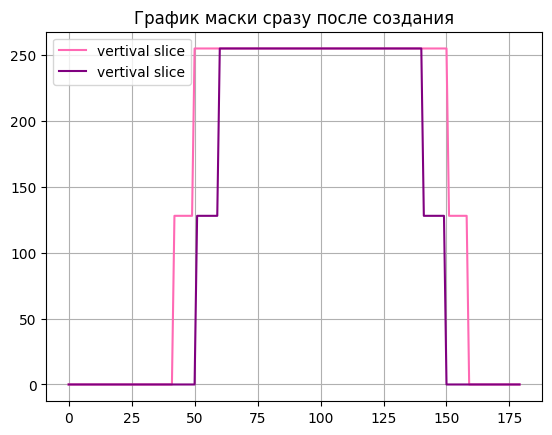

In [114]:
# plt.plot(crop[100], label='horizontal slice')
plt.plot(crop[:,70], color='hotpink', label='vertival slice')
plt.plot(crop[:,40], color='purple', label='vertival slice')
plt.title('График маски сразу после создания')
plt.legend()
plt.grid()

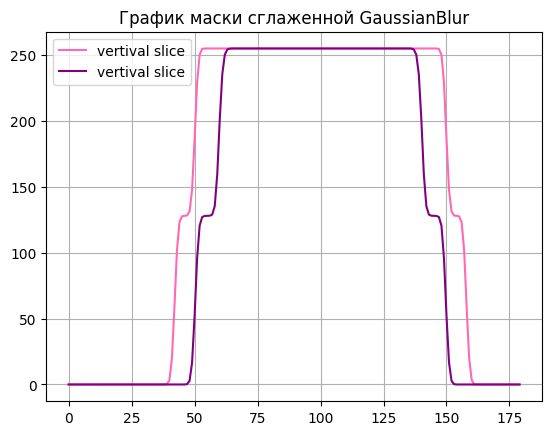

In [4]:
blured = cv2.GaussianBlur(crop, (13, 13), sigmaX=1, sigmaY=1)
plt.plot(blured[:,70], color='hotpink', label='vertival slice')
plt.plot(blured[:,40], color='purple', label='vertival slice')
plt.title('График маски сглаженной GaussianBlur')
plt.legend()
plt.grid()

In [13]:
# f_transform = np.fft.fft2(crop)
# f_shift = np.fft.fftshift(f_transform)

# plt.imshow(f_shift.astype(np.uint8), cmap='gray')

In [14]:
# f_ishift = np.fft.ifftshift(crop)
# image_back = np.fft.ifft2(f_ishift)

# plt.imshow(image_back.astype(np.uint8), cmap='gray')

In [15]:
# plt.imshow(blured, cmap='gray')

In [115]:
rows, cols = crop.shape
mask_bord_bin = cv2.inRange(crop, 128, 128)
# plt.imshow(mask_bord_bin)
# dist_image_cols = [[[] for  _ in range(cols)] for _ in range(rows)]

dist_col = np.zeros_like(mask_bord_bin, dtype=np.float32)

for col in range(0, cols):
    # print(col)
    col_mask = mask_bord_bin[:,col]
    
    nonzero_ind = np.nonzero(col_mask)[0]
    start_ind = np.where(np.diff(col_mask == 255))[0] + 1
    segments = np.split(col_mask, start_ind)
    # print(segments)
    tmp = 0 
    for segm in segments:
        dist_col[:, col][tmp:tmp + len(segm)] = (len(segm))
        tmp = tmp + len(segm)

dist_row = np.zeros_like(mask_bord_bin, dtype=np.float32)
for row in range(rows):
    row_mask = mask_bord_bin[row,:]
    nonzero_ind = np.nonzero(row_mask)[0]
    # print(nonzero_ind)
    start_ind = np.where(np.diff(row_mask == 255))[0] + 1
    segments = np.split(row_mask, start_ind)
    tmp = 0 
    
    for segm in segments:
        dist_row[row, :][tmp:tmp + len(segm)] = (len(segm))
        tmp = tmp + len(segm)

# angles for rows and cols
alpha_rows = np.zeros_like(crop, dtype=np.float32)
alpha_rows[crop == 128] = np.arctan(700 / (dist_row[crop == 128] * 12))

alpha_cols = np.zeros_like(crop, dtype=np.float32)
alpha_cols[crop == 128] = np.arctan(700 / (dist_col[crop == 128] * 12))

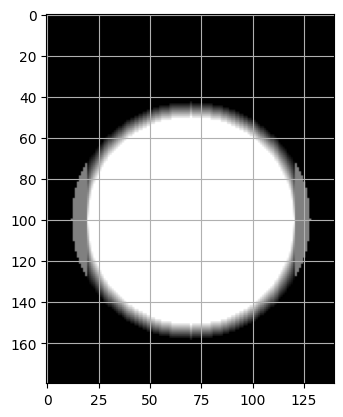

In [258]:
bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
copy_crop = crop.copy()

for col in range(0, cols):
    col_mask_bord = bord_mask[:,col]
    col_mask_hole = hole_mask[:,col]
    nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
    nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

    start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
    start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1 # где начинается и заканчивается белый 

    start_ind_back = []
    for ind in start_ind_bord:
        if ind not in start_ind_hole:
            start_ind_back.append(ind) # где заканчивается и начинается черный

    if start_ind_hole is not None:
        for w, b in zip(start_ind_hole, start_ind_back):
            if w > b:
                for i in range(w-1, b-1, -1):
                    color = 255*(i-b)//(w-b)
                    copy_crop[i,col] = color
            else:
                for i in range(w, b):
                    color = 255*(b-i)//(b-w)
                    copy_crop[i,col] = color

plt.imshow(copy_crop, cmap='gray')
plt.plot(copy_crop[:,70])
plt.grid()

f(X) = (x - x_n)**3 + h

[ 50 151] [42, 159]
[41, 51]
[40 41 42 43 44 45 46 47 48 49 50 51] [  0.   0.   0.  31.  63.  95. 127. 159. 191. 223. 255. 255.]
[150, 160]
[149 150 151 152 153 154 155 156 157 158 159 160] [255. 255. 255. 223. 191. 159. 127.  95.  63.  31.   0.   0.]


/home/sasha/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sasha/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


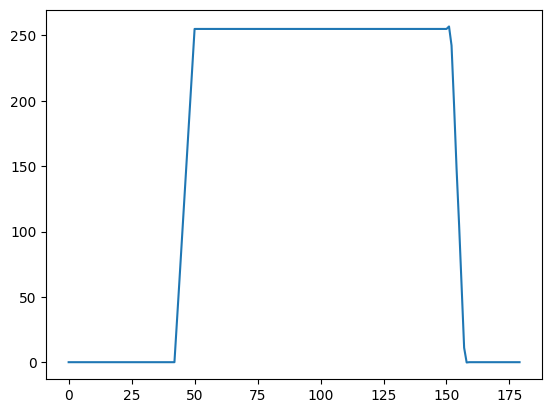

In [117]:
import random
from scipy.interpolate import CubicSpline

bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
# copy_crop = crop.copy()

for col in range(0, cols):
    if col == 70:
        col_mask_bord = bord_mask[:,col]
        col_mask_hole = hole_mask[:,col]
        nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
        nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

        start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1 # где начинается и заканчивается белый 
        # print(start_ind_bord)
        start_ind_back = []
        for ind in start_ind_bord:
            if ind not in start_ind_hole:
                start_ind_back.append(ind) # где заканчивается и начинается черный

        print(start_ind_hole, start_ind_back)
        for i, j in zip(start_ind_hole, start_ind_back):
            if i < j:
                segment = [i-1, j+1]
                # print('here ind hole < ind back', i, j)
                # print('first segment for hole', segment)
            else:
                # print('here ind hole > ind back', i, j)
                segment = [j-1, i+1]
                # print('second segment for hole', segment)
            # if len(segment) == 1:
            #     continue
            # else:
            print(segment)
            node = random.randint(segment[0]+1, segment[1]-1)
            # print(node)
            # segment_nodes = [segment[0], node, segment[1]]
            # segment_nodes = copy_crop[segment[0]:segment[1],col]
            segment_nodes = np.arange(segment[0]-1, segment[1]+1)
            # segment_values = [copy_crop[segment[0], col], copy_crop[node, col], copy_crop[segment[1], col]]
            segment_values = copy_crop[segment[0]-1:segment[1]+1,col]
            print(segment_nodes, segment_values)
            coefficients = np.polyfit(segment_nodes, segment_values,10)  # Аппроксимирующая кубическая функция
            
            # cs = CubicSpline(segment_nodes, segment_values)
            # cs = CubicSpline(segment_nodes, segment_values)
            # f_ishift = np.fft.ifftshift(segment_values, n=16)
            # print(cs)
            x = np.linspace(segment[0], segment[1], np.abs(i-j))
            # y_new = cs(x)
            y_new = np.polyval(coefficients, x) 
            # y_new = np.fft.ifft(f_ishift)

            y = copy_crop[:, col].copy()
            y[segment[0]+1:segment[1]-1] = y_new    

        plt.plot(np.arange(0, 180), y)
            # plt.plot(copy_crop[:, col], color='black')

        
           

    

[ 50 151] [42, 159]
[41, 51]
node 46
h 127.0
[41 42 43 44 45] [ 0.  0. 31. 63. 95.]
[150, 160]
node 152
h 223.0
[150 151] [255. 255.]


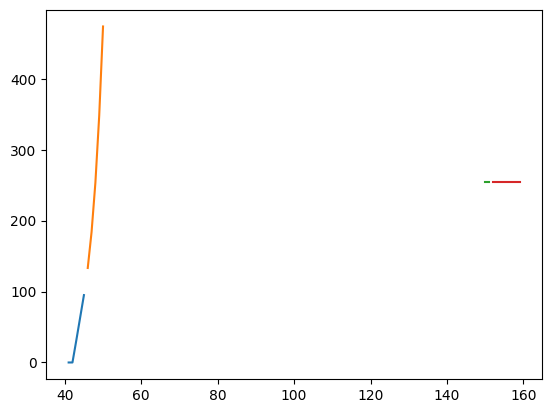

In [172]:
# a = 5.0  # Наклон прямой
 # Смещение по оси y
A = 0.5  # Амплитуда осцилляций
B = 1.0  # Частота осцилляций
C = np.pi / 6  # Смещение по оси x

# def f(x, xi, h):
def f(x, h):
    b = h 
    a = np.arctan(np.abs(np.gradient(h, x)))
    # C = np.pi / h
    print('a', a)
    return a * x + b + A * np.sin(B * x + C)
# y = np.vectorize(f, otypes=[float])

import random
from scipy.interpolate import CubicSpline

bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
# copy_crop = crop.copy()

for col in range(0, cols):
    if col == 70:
        col_mask_bord = bord_mask[:,col]
        col_mask_hole = hole_mask[:,col]
        nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
        nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

        start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1 # где начинается и заканчивается белый 
        # print(start_ind_bord)
        start_ind_back = []
        for ind in start_ind_bord:
            if ind not in start_ind_hole:
                start_ind_back.append(ind) # где заканчивается и начинается черный

        print(start_ind_hole, start_ind_back)
        for i, j in zip(start_ind_hole, start_ind_back):
            if i < j:
                segment = [i-1, j+1]
                # print('here ind hole < ind back', i, j)
                # print('first segment for hole', segment)
            else:
                # print('here ind hole > ind back', i, j)
                segment = [j-1, i+1]

            print(segment)
            node = random.randint(segment[0], segment[1]-1)
            xi = np.abs(j- node)
            print('node', node)
            h = copy_crop[:,col][node]
            print('h', h)
            # segment_nodes = [segment[0], node, segment[1]]
            # segment_nodes = copy_crop[segment[0]:segment[1],col]
            segment_nodes = np.arange(segment[0], node)
            # segment_values = [copy_crop[segment[0], col], copy_crop[node, col], copy_crop[segment[1], col]]
            segment_values = copy_crop[segment[0]:node,col]
            segment_nodes1 = np.arange(node, segment[1])
            # segment_values = [copy_crop[segment[0], col], copy_crop[node, col], copy_crop[segment[1], col]]
            segment_values1 = copy_crop[node:segment[1],col]
            
            print(segment_nodes, segment_values)
            # coefficients = np.polyfit(segment_nodes, segment_values,10)  # Аппроксимирующая кубическая функция
            
            cs = CubicSpline(segment_nodes, segment_values)
            cs1 = CubicSpline(segment_nodes1, segment_values1)
            # cs = CubicSpline(segment_nodes, segment_values)
            # f_ishift = np.fft.ifftshift(segment_values, n=16)
            # print(cs)
            # x = np.linspace(segment[0], segment[1], np.abs(i-j))
            x = np.arange(segment[0], node)
            x1 = np.arange(node, segment[1])

            y_new = cs(x)
            y_new1 = cs(x1)
            # y_new = []
            # for i in range(len(segment_nodes)):
            #    print(i, segment_nodes[i])
            # y_new = f(segment_nodes, segment_values)
            plt.plot(segment_nodes, y_new)
            plt.plot(segment_nodes1, y_new1)

        # x_new = np.arange(0, 180)
        # y_ = f(x_new, copy_crop[:,col])
            # print(y_new)
            # y_new = np.fft.ifft(f_ishift)

            # y_new = copy_crop[:, col].copy()
            # y[segment[0]+1:segment[1]-1] = y_new

        # plt.plot(x_new, y_)

#### тест смешанной функции синус + линейная

In [ ]:
# a = 5.0  # Наклон прямой
 # Смещение по оси y
A = 0.5  # Амплитуда осцилляций
B = 1.0  # Частота осцилляций
C = np.pi / 6  # Смещение по оси x

def f(x, h):
    b = h 
    a = np.arctan(np.abs(np.gradient(h, x)))
    # C = np.pi / h
    print('a', a)
    return a * x + b + A * np.sin(B * x + C)

import random
from scipy.interpolate import CubicSpline

bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)

for col in range(0, cols):
    if col == 70:
        col_mask_bord = bord_mask[:,col]
        col_mask_hole = hole_mask[:,col]
        nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
        nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

        start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1 # где начинается и заканчивается белый 
        # print(start_ind_bord)
        start_ind_back = []
        for ind in start_ind_bord:
            if ind not in start_ind_hole:
                start_ind_back.append(ind) # где заканчивается и начинается черный

        print(start_ind_hole, start_ind_back)
        for i, j in zip(start_ind_hole, start_ind_back):
            if i < j:
                segment = [i-1, j+1]
            else:
                segment = [j-1, i+1]

            print('current segment ', segment)
            node = random.randint(segment[0], segment[1]-1)
            xi = np.abs(j- node)
            print('current node ', node)
            h = copy_crop[:,col][node]
            print('h for current node ', h)
            # segment_nodes = [segment[0], node, segment[1]]
            segment_nodes = copy_crop[segment[0]:segment[1],col]
            segment_values = copy_crop[segment[0]:node,col]
            print('current segment nodes ', segment_nodes)
            print('current segment vals ', segment_values)
            

            segment_nodes1 = np.arange(node, segment[1])
            # segment_values = [copy_crop[segment[0], col], copy_crop[node, col], copy_crop[segment[1], col]]
            segment_values1 = copy_crop[node:segment[1],col]
            
            print(segment_nodes, segment_values)
            # coefficients = np.polyfit(segment_nodes, segment_values,10)  # Аппроксимирующая кубическая функция
            
            cs = CubicSpline(segment_nodes, segment_values)
            cs1 = CubicSpline(segment_nodes1, segment_values1)
            # cs = CubicSpline(segment_nodes, segment_values)
            # f_ishift = np.fft.ifftshift(segment_values, n=16)
            # print(cs)
            # x = np.linspace(segment[0], segment[1], np.abs(i-j))
            x = np.arange(segment[0], node)
            x1 = np.arange(node, segment[1])

            y_new = cs(x)
            y_new1 = cs(x1)
            # y_new = []
            # for i in range(len(segment_nodes)):
            #    print(i, segment_nodes[i])
            # y_new = f(segment_nodes, segment_values)
            plt.plot(segment_nodes, y_new)
            plt.plot(segment_nodes1, y_new1)

        # x_new = np.arange(0, 180)
        # y_ = f(x_new, copy_crop[:,col])
            # print(y_new)
            # y_new = np.fft.ifft(f_ishift)

            # y_new = copy_crop[:, col].copy()
            # y[segment[0]+1:segment[1]-1] = y_new

        # plt.plot(x_new, y_)

In [217]:
def calculate_coefficients(A, par, t):
    b_vector = np.zeros((len(par)), dtype=np.float32)

    for i in range(1, len(b_vector) - 1):
        b_vector[i] = (3 / (t[i + 1] - t[i])) * (par[i + 1] - par[i]) - (3 / (t[i] - t[i - 1])) * (par[i] - par[i - 1])

    
    c = A.dot(b_vector)

    a = np.zeros((len(par)), dtype=np.float32)
    d = np.zeros((len(par)), dtype=np.float32)
    b = np.zeros((len(par)), dtype=np.float32)

    
    for i in range(len(par) - 1):
        a[i] = par[i]
        d[i] = (c[i + 1] - c[i]) / (3 * (t[i + 1] - t[i]))

    
    for i in range(len(par)):
        if i == 0:
            b[i] = 1 / (t[i + 1] - t[i]) * (a[i + 1] - a[i]) - (t[i + 1] - t[i]) / 3 * (c[i + 1] + 2 * c[i])
        else:
            b[i] = b[i - 1] + 2 * c[i - 1] * (t[i] - t[i - 1]) + 3 * d[i - 1] * (t[i] - t[i - 1]) ** 2

    return a, b, c, d

def define_segment(t, t_i, a, b, c, d):
    return (a + b * (t - t_i) + c * (t - t_i) ** 2 + d * (t - t_i) ** 3)




In [220]:
def calculate_spline_segm(par, t, coefs):
    full_spline = []
    for iter in range(len(par) - 1):
        t_= np.zeros(int((t[iter + 1] - t[iter]) / h), dtype=np.float32)
        t_ = [t[iter] + h * i for i in range(len(t_))]
        segments = np.zeros(len(t_), dtype=np.float32)
        for i in range(len(t_)):
            segments[i] = define_segment(t_[i], t[iter], coefs[0][iter], coefs[1][iter], coefs[2][iter], coefs[3][iter])
            full_spline.append(segments[i])
            print(full_spline)
            # if t_[i].is_integer():
            #     for_distance[j] = segments[i]
            #     j += 1
    return full_spline

[  0  15  30  45  60  75  90 105 120 135 150 165 180]


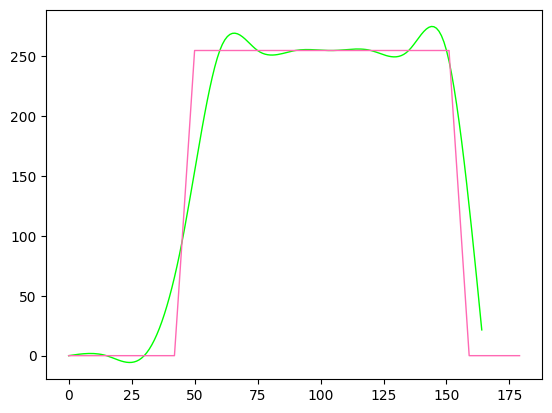

In [254]:
# def f(x, h):
#     b = 10
#     a = np.arctan(np.abs(np.gradient(h, x)))
#     A = 0.5  # Амплитуда осцилляций
#     B = 0.2  # Частота осцилляций
#     C = np.pi / 6  # Смещение по оси x
#     # C = np.pi / h
#     print('a', a)
#     return a * x + b + A * np.sin(B * x + C)
def define_segment(t, t_i, a, b, c, d):
    return (a + b * (t - t_i) + c * (t - t_i) ** 2 + d * (t - t_i) ** 3)


def calculate_spline_segm(par, t, coefs):
    full_spline = []
    h = 1
    for iter in range(len(par) - 1):
        t_= np.zeros(int((t[iter + 1] - t[iter]) / h), dtype=np.float32)
        # print(t_)
        t_ = [t[iter] + h * i for i in range(len(t_))]
        segments = np.zeros(len(t_), dtype=np.float32)
        for i in range(len(t_)):
            segments[i] = define_segment(t_[i], t[iter], coefs[0][iter], coefs[1][iter], coefs[2][iter], coefs[3][iter])
            full_spline.append(segments[i])

    return full_spline

bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
m = 15
for col in range(0, cols):
    if col == 70:
        x = np.arange(0, len(copy_crop[:,col]))
        y = copy_crop[:,col]
        t = np.linspace(0, len(x), len(x)+1, dtype=np.int32)
        t_hat = t[::m]
        x_hat = x[::m]
        y_hat = y[::m]
        print(t_hat)

        A = np.zeros((len(x_hat), len(x_hat)), dtype=np.float32)
        A[0][0] = 1
        A[-1][-1] = 1

        for i in range(1, len(x_hat) - 1):
            A[i][i - 1] = x_hat[i] - x_hat[i - 1]
            A[i][i] = 2 * (x_hat[i + 1] - x_hat[i - 1])
            A[i][i + 1] = x_hat[i + 1] - x_hat[i]
        A = np.linalg.inv(A)

        # coef_y = calculate_coefficients(A, y_hat, t_hat)
        coef_y = calculate_coefficients(A, y_hat, x_hat)

        # coef_x = calculate_coefficients(A, x_hat, y_hat)
        # print(coef_x)

        # print(coef_y)
        # spline_y = calculate_spline_segm(y_hat, t_hat, coef_y)
        spline_y = calculate_spline_segm(y_hat, x_hat, coef_y)
        # print(len(spline_y))
        # spline_x = calculate_spline_segm(x_hat, y_hat, coef_x)
        # print(spline_y)
        # plt.plot(np.arange(0, len(spline_y)), np.clip(spline_y, 0, 255), linewidth=1, color='lime')
        plt.plot(np.arange(0, len(spline_y)), spline_y, linewidth=1, color='lime')
        # plt.plot(np.arange(0, len(spline_x)), spline_x, linewidth=1, color='lime')


        plt.plot(np.arange(0, 180), y, linewidth=1, color='hotpink')

        


In [ ]:
def f(x, h):
    b = 10
    a = np.arctan(np.abs(np.gradient(h, x)))
    A = 0.5  # Амплитуда осцилляций
    B = 0.2  # Частота осцилляций
    C = np.pi / 6  # Смещение по оси x
    # C = np.pi / h
    print('a', a)
    return a * x + b + A * np.sin(B * x + C)
# def define_segment(t, t_i, a, b, c, d):
#     return (a + b * (t - t_i) + c * (t - t_i) ** 2 + d * (t - t_i) ** 3)


def calculate_spline_segm(par, t, coefs):
    full_spline = []
    h = 1
    for iter in range(len(par) - 1):
        t_= np.zeros(int((t[iter + 1] - t[iter]) / h), dtype=np.float32)
        # print(t_)
        t_ = [t[iter] + h * i for i in range(len(t_))]
        segments = np.zeros(len(t_), dtype=np.float32)
        for i in range(len(t_)):
            segments[i] = define_segment(t_[i], t[iter], coefs[0][iter], coefs[1][iter], coefs[2][iter], coefs[3][iter])
            full_spline.append(segments[i])

    return full_spline

bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)
m = 15
for col in range(0, cols):
    if col == 70:
        x = np.arange(0, len(copy_crop[:,col]))
        y = copy_crop[:,col]
        t = np.linspace(0, len(x), len(x)+1, dtype=np.int32)
        t_hat = t[::m]
        x_hat = x[::m]
        y_hat = y[::m]
        print(t_hat)

        A = np.zeros((len(x_hat), len(x_hat)), dtype=np.float32)
        A[0][0] = 1
        A[-1][-1] = 1

        for i in range(1, len(x_hat) - 1):
            A[i][i - 1] = x_hat[i] - x_hat[i - 1]
            A[i][i] = 2 * (x_hat[i + 1] - x_hat[i - 1])
            A[i][i + 1] = x_hat[i + 1] - x_hat[i]
        A = np.linalg.inv(A)

        # coef_y = calculate_coefficients(A, y_hat, t_hat)
        coef_y = calculate_coefficients(A, y_hat, x_hat)

        # coef_x = calculate_coefficients(A, x_hat, y_hat)
        # print(coef_x)

        # print(coef_y)
        # spline_y = calculate_spline_segm(y_hat, t_hat, coef_y)
        spline_y = calculate_spline_segm(y_hat, x_hat, coef_y)
        # print(len(spline_y))
        # spline_x = calculate_spline_segm(x_hat, y_hat, coef_x)
        # print(spline_y)
        # plt.plot(np.arange(0, len(spline_y)), np.clip(spline_y, 0, 255), linewidth=1, color='lime')
        plt.plot(np.arange(0, len(spline_y)), spline_y, linewidth=1, color='lime')
        # plt.plot(np.arange(0, len(spline_x)), spline_x, linewidth=1, color='lime')


        plt.plot(np.arange(0, 180), y, linewidth=1, color='hotpink')

        


[ 50 151] [42, 159]
a [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 1.5063695 1.539061  1.5395565 1.5395565 1.5395565 1.5395565 1.5395565
 1.5395565 1.5083776 0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        

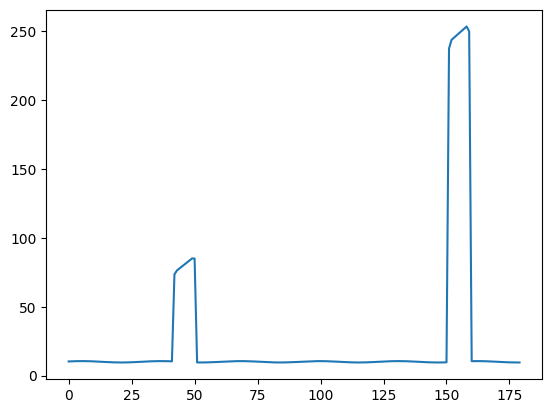

In [255]:
def f(x, h):
    b = 10
    a = np.arctan(np.abs(np.gradient(h, x)))
    A = 0.5  # Амплитуда осцилляций
    B = 0.2  # Частота осцилляций
    C = np.pi / 6  # Смещение по оси x
    # C = np.pi / h
    print('a', a)
    return a * x + b + A * np.sin(B * x + C)

bord_mask = cv2.inRange(crop, 128, 128)
bord_mask[bord_mask == 255] = 128

hole_mask = cv2.inRange(crop, 255,255)

for col in range(0, cols):
    if col == 70:
        col_mask_bord = bord_mask[:,col]
        col_mask_hole = hole_mask[:,col]
        nonzero_ind_bord = np.nonzero(col_mask_bord)[0]
        nonzero_ind_hole = np.nonzero(col_mask_hole)[0]

        start_ind_bord = np.where(np.diff(col_mask_bord == 128))[0] + 1
        start_ind_hole = np.where(np.diff(col_mask_hole == 255))[0] + 1 # где начинается и заканчивается белый 
        # print(start_ind_bord)
        start_ind_back = []
        for ind in start_ind_bord:
            if ind not in start_ind_hole:
                start_ind_back.append(ind) # где заканчивается и начинается черный

        print(start_ind_hole, start_ind_back)
        x = np.arange(0, len(copy_crop[:,col]))
        y = copy_crop[:,col]
        y_new = f(x, y)
        plt.plot(x, np.clip(y_new, 0, 255))
        


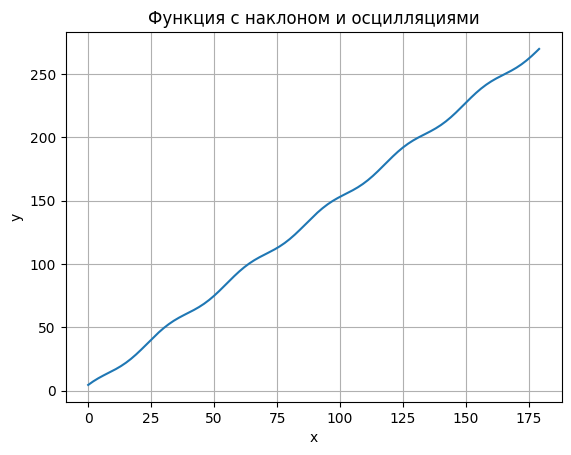

In [132]:
a = 1.5  # наклон прямой
b = 2.0  # смещение по оси y
A = 2.5  # амплитуда осцилляций
B = 0.2  # частота осцилляций
C = np.pi / 2 # смещение по оси x

# np.arctan(np.gradient(h, x)) # наклон прямой

x = np.arange(0, 180)
y_old = copy_crop[:,col]
y = a * x + b + A * np.sin(B * x + C)

plt.plot(x, y_old + y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функция с наклоном и осцилляциями')
plt.grid()
plt.show()

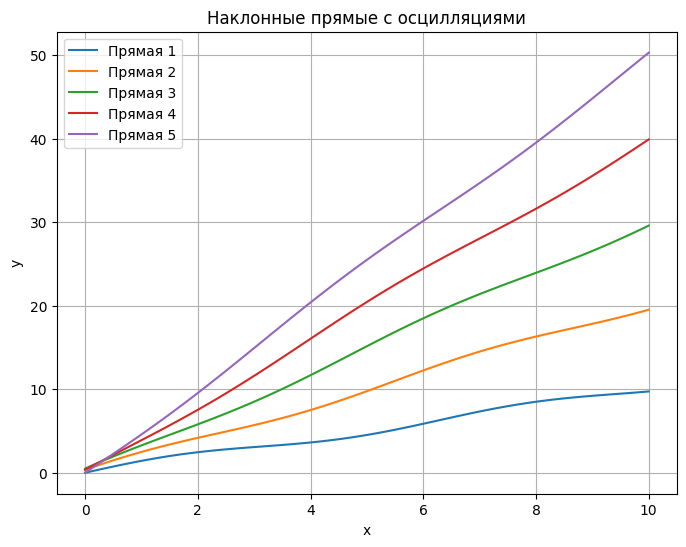

In [120]:
x = np.linspace(0, 10, 100)
n_lines = 5

y = np.zeros((n_lines, len(x)))

for i in range(n_lines):
    slope = i + 1
    y[i] = slope * x

    amplitude = 0.5
    frequency = 1.0
    phase = i * np.pi / 4
    y[i] += amplitude * np.sin(frequency * x + phase)

plt.figure(figsize=(8, 6))
for i in range(n_lines):
    plt.plot(x, y[i], label=f'Прямая {i + 1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Наклонные прямые с осцилляциями')
plt.legend()
plt.grid()
plt.show()

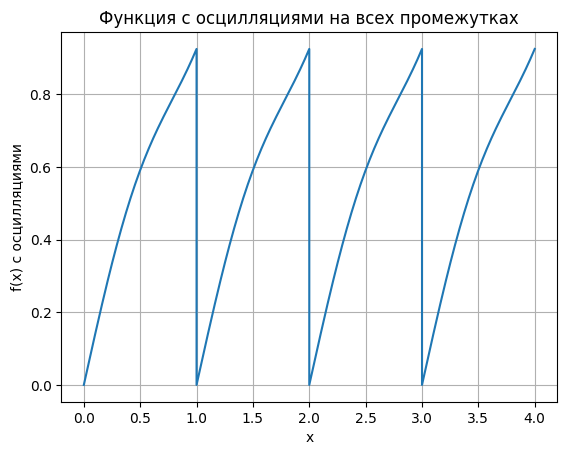

In [145]:
x_interval = np.linspace(0, 1, 100)  # Диапазон x внутри каждого интервала
y_interval = np.zeros_like(x_interval)

# Настройте параметры осцилляций
amplitude = 0.1  # Амплитуда осцилляций
frequency = 4.0  # Частота осцилляций

# Добавьте осцилляции к каждому интервалу
y_interval = x_interval + amplitude * np.sin(frequency * x_interval)

# Склейте интервалы
x = np.concatenate([x_interval, x_interval + 1, x_interval + 2, x_interval + 3])
y = np.concatenate([y_interval, y_interval, y_interval, y_interval])

# Постройте график
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x) с осцилляциями')
plt.title('Функция с осцилляциями на всех промежутках')
plt.grid()
plt.show()

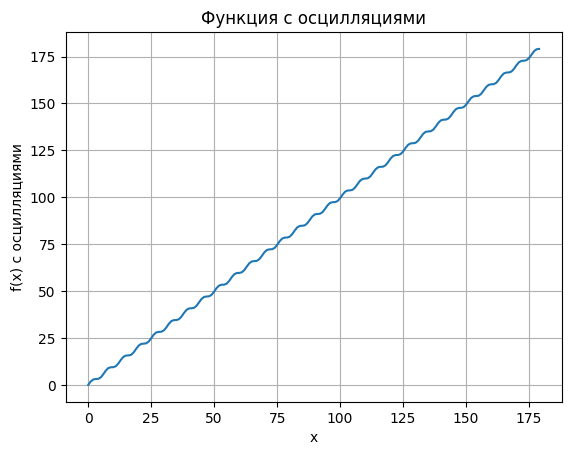

In [142]:
def base_function(x):
    return x

# Создайте функцию с осцилляциями
def oscillating_function(x, amplitude, frequency):
    return base_function(x) + amplitude * np.sin(frequency * x)

# Диапазон x значений
x = np.arange(0, 180)

# Добавьте осцилляции к функции
amplitude = 1.0  # Амплитуда осцилляций
frequency = 1.0  # Частота осцилляций

y = oscillating_function(x, amplitude, frequency)

# Постройте график
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x) с осцилляциями')
plt.title('Функция с осцилляциями')
plt.grid()
plt.show()

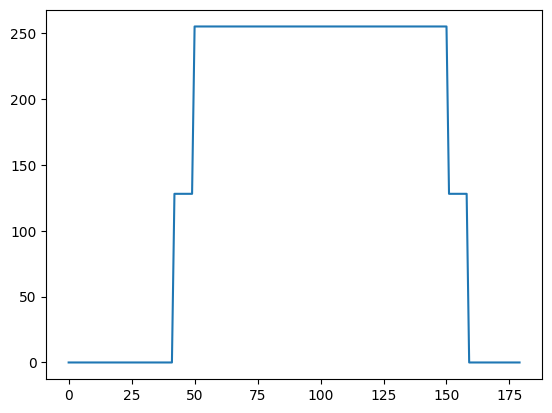

In [9]:
y = crop[:,70]
f_ishift = np.fft.ifftshift(y==0)
y_back = np.fft.ifft(f_ishift)
# y[y == 0] = y_back

y_forw = np.fft.fft(y)
f_shift = np.fft.fftshift(y_forw )

plt.plot(np.arange(0, len(y)), y)
# plt.plot(np.arange(0, len(y)), y_back)
# plt.plot(np.arange(0, len(y)), y_forw)


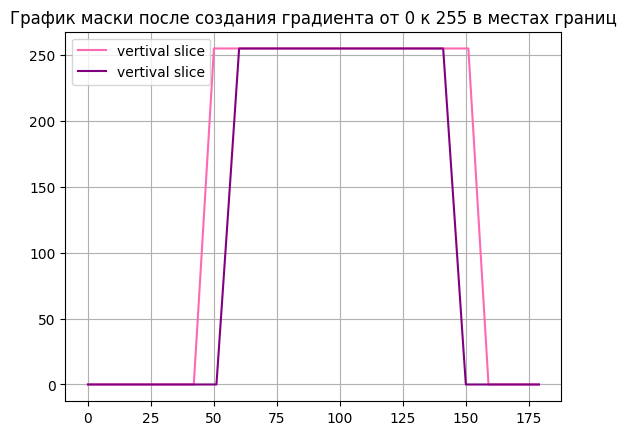

In [10]:
plt.plot(copy_crop[:,70], color='hotpink', label='vertival slice')
plt.plot(copy_crop[:,40], color='purple', label='vertival slice')

plt.title('График маски после создания градиента от 0 к 255 в местах границ')
plt.legend()
plt.grid()

- аппроксимация только серого

In [11]:
rows, cols = crop.shape
mask_bord_bin = cv2.inRange(crop, 128, 128)
mask_bord_bin[mask_bord_bin == 255] = 128
# mask_bord_bin[crop == 255] = 255

# plt.imshow(mask_bord_bin)
# dist_image_cols = [[[] for  _ in range(cols)] for _ in range(rows)]

dist_col = np.zeros_like(mask_bord_bin, dtype=np.float32)
signal_col = np.zeros_like(crop, dtype=np.float32)
for col in range(0, cols):
    if col == 25:
        break
    col_mask = mask_bord_bin[:,col]
    nonzero_ind = np.nonzero(col_mask)[0]
    start_ind = np.where(np.diff(col_mask == 128))[0] + 1
    segments = np.split(col_mask, start_ind)
    tmp = 0
    for segment in segments:
        # print(col, len(segment))
        if 128 in segment:
            # print(segment)
            colors = []
            for i in range(len(segment)):
                if len(segment) > 1:
                    intensity = (i+1)/len(segment)
                else:
                    intensity = (i)/len(segment)

                colors.append((0 + intensity * (255 - 0)))
                # print(colors)
            # print(len(colors))
            print(col,len(colors))
            signal_col[:, col][tmp:tmp + len(segment)] = colors[:len(segment)]
            print(signal_col[:, col][tmp:tmp + len(segment)])
        tmp = tmp + len(segm)

        
    
    

12 1
[0.]
13 21
[ 12.142858  24.285715  36.42857   48.57143   60.714287  72.85714
  85.        97.14286  109.28571  121.42857  133.57143  145.71428
 157.85715  170.       182.14285  194.28572  206.42857  218.57143
 230.71428  242.85715  255.      ]
14 31
[  8.225806  16.451612  24.67742   32.903225  41.129032  49.35484
  57.580647  65.80645   74.03226   82.258064  90.48387   98.70968
 106.935486 115.16129  123.3871   131.6129   139.83871  148.06451
 156.29033  164.51613  172.74193  180.96774  189.19354  197.41936
 205.64516  213.87097  222.09677  230.32259  238.54839  246.7742
 255.      ]
15 37
[  6.891892  13.783784  20.675676  27.567568  34.45946   41.351353
  48.243244  55.135136  62.027027  68.91892   75.810814  82.702705
  89.5946    96.48649  103.37838  110.27027  117.16216  124.054054
 130.94595  137.83784  144.72974  151.62163  158.51352  165.40541
 172.2973   179.1892   186.08109  192.97298  199.86487  206.75676
 213.64865  220.54054  227.43243  234.32433  241.21622  248.1081

ValueError: could not broadcast input array from shape (43,) into shape (40,)

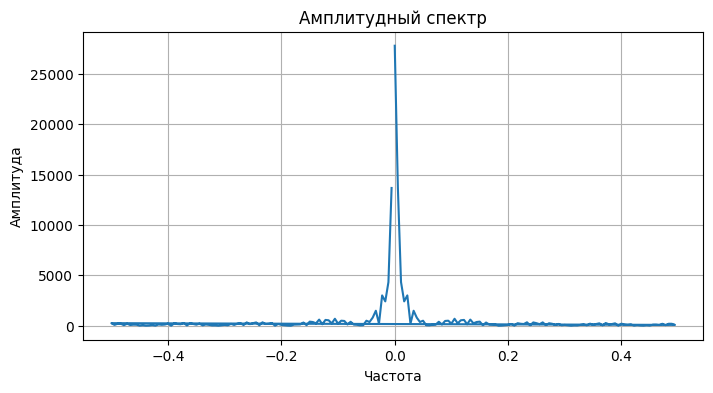

In [12]:
x = np.linspace(0, 140, 180)
fft_result = np.fft.fft(crop[:,70])
freqs = np.fft.fftfreq(len(x))

# Построим график амплитуд спектра
plt.figure(figsize=(8, 4))
plt.plot(freqs, np.abs(fft_result))
plt.title("Амплитудный спектр")
plt.xlabel("Частота")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [12]:
np.unique(mask_bord_bin)

array([  0, 128], dtype=uint8)

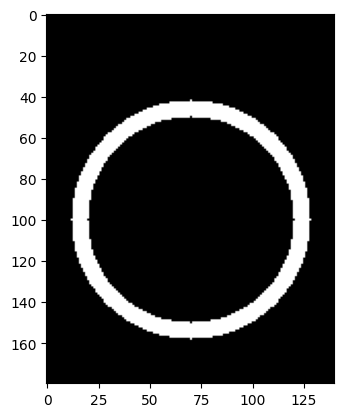

In [13]:
plt.imshow(mask_bord_bin, cmap='gray')

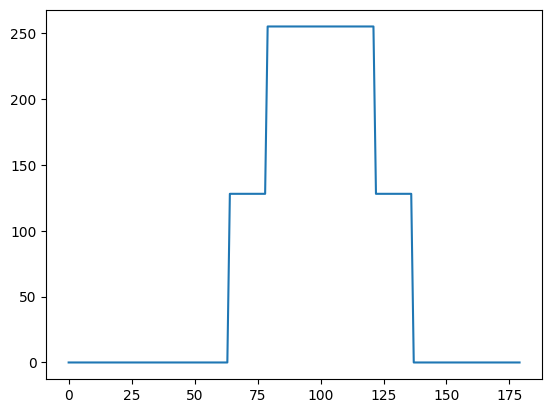

In [14]:
plt.plot(crop[:,25])

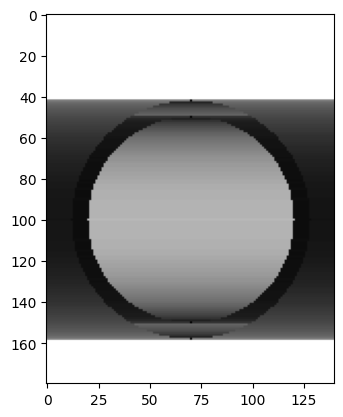

In [15]:
# plt.imshow(mask_bord_bin, cmap='gray')
plt.imshow(dist_row, cmap='gray')

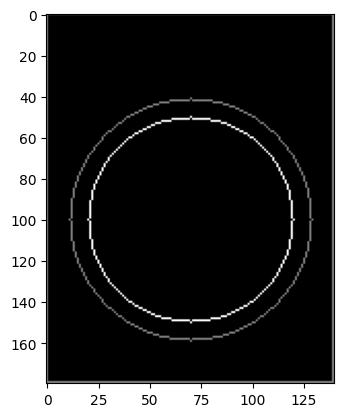

In [22]:
img = np.zeros_like(crop, dtype=np.float32)
hole_contours, _ = cv2.findContours(mask_hole, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
back_contours, _ = cv2.findContours(mask_back, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, hole_contours, -1, 255, 0)
cv2.drawContours(img, back_contours, -1, 128, 0)

plt.imshow(img, cmap='gray')

In [27]:
image = crop
mask_contour = cv2.inRange(crop, 128, 128)
# Примените алгоритм Кэнни для поиска контуров
# edges = cv2.Canny(image, threshold1=128, threshold2=255)

# Измерьте толщину контура в разных направлениях
def measure_contour_thickness(contour, direction):
    # Создайте пустое изображение для рисования контура
    contour_image = np.zeros_like(contour)

    # Нарисуйте контур на изображении
    # cv2.drawContours(contour_image, [contour], -1, 255, thickness=cv2.FILLED)

    # Создайте маску для выбранного направления
    if direction == 'vertical':
        kernel = np.array([[1], [1], [1]])
    elif direction == 'horizontal':
        kernel = np.array([[1, 1, 1]])
    else:
        raise ValueError("Недопустимое направление")

    # # Примените свертку маски к изображению контура
    thickness_image = cv2.filter2D(contour_image, -1, kernel)

    # # Найдите максимальное значение на изображении
    max_thickness = np.max(thickness_image)

    return max_thickness

# Измерьте толщину контура в вертикальном и горизонтальном направлениях
vertical_thickness = measure_contour_thickness(mask_contour, 'vertical')
horizontal_thickness = measure_contour_thickness(mask_contour, 'horizontal')

In [29]:
horizontal_thickness

0

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180


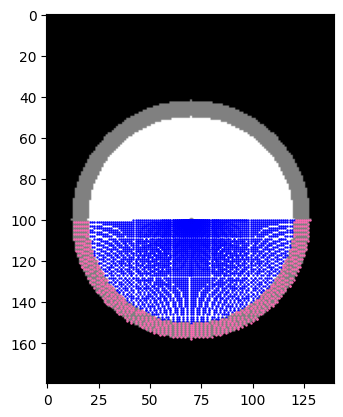

In [8]:
import math
delta_x = np.zeros_like(crop, dtype=np.float32)
cx = 70
cy = 100
rx, ry = cx, cy

radius = len(crop[100]==255)
radius = np.maximum(np.sum(crop[cx,:])//2, np.sum(crop[:,cy])//2)
# rx, ry = cx + radius, cy
step = 1
angle = 0
image = crop.copy()
edge = []
angle = 0
radius_length = 1
plt.scatter(cx, cy, color='black', s =10, alpha= 0.3)
# while True and ry != image.shape[0]-1 and rx != image.shape[1]-1:
while angle < 360:
    if angle == 180:
        break
    rx = int(cx + radius_length * np.cos(np.radians(angle)))
    ry = int(cy + radius_length * np.sin(np.radians(angle)))
    # print(rx, ry)
    # rx += step
    # ry += step

    pix_color = image[int(ry), int(rx)]
    # if pix_color == 255:
    #     # angle += 1
    #     # edge.append((rx, ry))
    #     plt.scatter(rx, ry, color='blue', s =0.5)

    

    if pix_color == 0:
        # for el in edge:
        #     delta_x[el[1], el[0]] = len(edge)
        edge = []
        angle += 2
        # print(angle)
        radius_length = 1
        # break
    
    elif pix_color == 128:
        edge.append((rx, ry))
        radius_length += 1
        plt.scatter(rx, ry, color='hotpink', s =0.5)

    elif pix_color == 255:
        radius_length += 1
        plt.scatter(rx, ry, color='blue', s =0.5)



        # edge = []
        # angle += 1
        # rx, ry = cx, cy
        # print(len(edge))
        # break

    # for i in range(len(edge)):
        # delta_x[edge[i][0], edge[i][1]] = len(edge)
        # print(np.unique(delta_x))
        # edge = []
        # break

        # print(ry, rx)
        
        
plt.imshow(image, cmap='gray')
plt.savefig('out.png')
    

# while True:
#     dist = math.sqrt((crop[rx]))


In [13]:
len(edge)

0

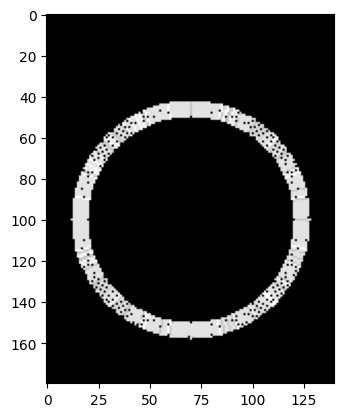

In [4]:
plt.imshow(delta_x, cmap='gray')

In [15]:
np.unique(delta_x)

array([ 0.,  7.,  8.,  9., 10., 11.], dtype=float32)

In [16]:
np.unique(delta_x)

array([0.], dtype=float32)

In [133]:
# np.sum(crop[100,:]==255)//2
np.sum(crop[:,70] == 255)//2

50

In [100]:
# plt.imshow(crop[100:101], cmap='gray')

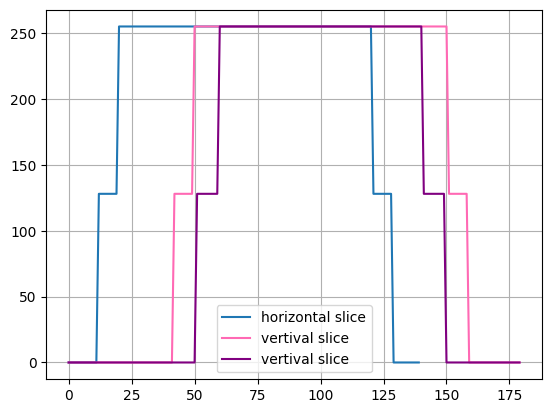